# Prosper Loan Data Exploration
## by Roselyn N. Kinuthia

## Preliminary Wrangling

This data set contains information on peer to peer loans facilitated by the credit company Prosper. I chose this dataset because I have been involved in credit scoring projects both in my current role and my previous roles.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading my dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Check out the high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
#Descriptive statistics for numeric variables
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [5]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

This dataset has 113,937 records and 81 columns. The number of columns is to high to do a proper exploration. Therefore, I am going to select a few columns that I will proceed with. I will explore these few columns and see what I will discover.

In [6]:
selected_target_columns =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [7]:

df2 = df[selected_target_columns]

In [8]:
#Let's view a small sample
df2.sample(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
66721,36,Completed,0.15904,0.1375,B,8.0,5,Full-time,3.0,5666.666667,1.0,4700,2010-06-29 00:00:00,0,183
31540,36,Current,0.19236,0.1559,B,6.0,1,Other,0.0,5416.666667,NaN,8000,2013-04-22 00:00:00,0,1
94548,36,Current,0.22773,0.1905,C,3.0,3,Employed,0.0,5000.000000,NaN,15000,2014-02-10 00:00:00,0,1
54669,36,Completed,0.12503,0.1110,NaN,NaN,1,Full-time,0.0,3833.333333,NaN,10000,2008-06-24 00:00:00,0,279
19171,36,Completed,0.20182,0.1945,NaN,NaN,0,Full-time,0.0,5403.666667,NaN,12200,2007-03-06 00:00:00,0,173
38310,36,Completed,0.16386,0.1495,NaN,NaN,4,Full-time,0.0,7833.333333,NaN,2000,2008-05-14 00:00:00,0,16
26202,36,Chargedoff,0.26954,0.2600,NaN,NaN,0,Not available,0.0,2666.666667,NaN,2000,2006-11-24 00:00:00,0,32
29739,60,Past Due (16-30 days),0.22262,0.1982,B,6.0,1,Employed,0.0,1333.333333,NaN,15000,2012-12-19 00:00:00,0,179
99646,36,Completed,0.17142,0.1570,NaN,NaN,1,Self-employed,0.0,2916.666667,NaN,7000,2008-10-09 00:00:00,0,210
17414,60,Current,0.16499,0.1419,B,6.0,1,Employed,0.0,11333.333333,NaN,15000,2013-06-24 00:00:00,0,1


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   EmploymentStatus           111682 non-null  object 
 8   DelinquenciesLast7Years    112947 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  TotalProsperLoans          22085 non-null   float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  Recommendations            11

In [10]:
#Checking for any nulls
df2.isna().sum()

Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

Prosper have used their own proprietary Prosper Rating from 2009. We have a lot of missing values in ProsperRating column and ProsperScore column as well. Let's drop these missing values:

In [11]:
df2 = df2.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df2.isna().sum()

index                            0
Term                             0
LoanStatus                       0
BorrowerAPR                      0
BorrowerRate                     0
ProsperRating (Alpha)            0
ProsperScore                     0
ListingCategory (numeric)        0
EmploymentStatus                 0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
TotalProsperLoans            65056
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

Next, I will convert the loan origination date to date time and fill the NAs in the TotalProsperLoans with zero

In [12]:
df2['LoanOriginationDate'] = pd.to_datetime(df2['LoanOriginationDate'])
df2['TotalProsperLoans'] = df2['TotalProsperLoans'].fillna(0)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerAPR                84853 non-null  float64       
 4   BorrowerRate               84853 non-null  float64       
 5   ProsperRating (Alpha)      84853 non-null  object        
 6   ProsperScore               84853 non-null  float64       
 7   ListingCategory (numeric)  84853 non-null  int64         
 8   EmploymentStatus           84853 non-null  object        
 9   DelinquenciesLast7Years    84853 non-null  float64       
 10  StatedMonthlyIncome        84853 non-null  float64       
 11  TotalProsperLoans          84853 non-null  float64       
 12  Loan

In [14]:
#Final check for any missing data
df2.isna().sum()

index                        0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
EmploymentStatus             0
DelinquenciesLast7Years      0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanOriginalAmount           0
LoanOriginationDate          0
Recommendations              0
Investors                    0
dtype: int64

In [15]:
df2.describe()

,index,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000
mean,56958.246850,42.486135,0.226658,0.196022,5.950067,3.312647,3.659435,5.931175e+03,0.340789,9083.440515,0.017560,68.264669
std,32885.220638,11.640346,0.079916,0.074631,2.376501,4.364277,9.347957,8.239944e+03,0.726235,6287.860058,0.187963,95.195831
min,1.000000,12.000000,0.045830,0.040000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,1.000000
25%,28507.000000,36.000000,0.163280,0.135900,4.000000,1.000000,0.000000,3.434000e+03,0.000000,4000.000000,0.000000,1.000000
50%,56960.000000,36.000000,0.219450,0.187500,6.000000,1.000000,0.000000,5.000000e+03,0.000000,7500.000000,0.000000,32.000000
75%,85420.000000,60.000000,0.292540,0.257400,8.000000,3.000000,2.000000,7.083333e+03,0.000000,13500.000000,0.000000,97.000000
max,113936.000000,60.000000,0.423950,0.360000,11.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.000000,19.000000,1189.000000


On the ProsperScore column, i notice an outlier. Some borrowers seem to be having a score of above 10. I will exclude them.

In [16]:
df2 = df2[df2.ProsperScore <= 10]

In [17]:
df2.describe()

,index,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,8.339700e+04,83397.000000,83397.000000,83397.000000,83397.000000
mean,56960.167068,42.482248,0.228663,0.197815,5.861902,3.316222,3.698634,5.880222e+03,0.329173,8982.621185,0.017291,67.810161
std,32903.815432,11.654919,0.079011,0.073931,2.300729,4.363780,9.396220,8.271991e+03,0.709997,6202.474999,0.187729,94.190355
min,1.000000,12.000000,0.045830,0.040000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,1.000000
25%,28472.000000,36.000000,0.167320,0.139600,4.000000,1.000000,0.000000,3.416667e+03,0.000000,4000.000000,0.000000,1.000000
50%,56969.000000,36.000000,0.221400,0.189900,6.000000,1.000000,0.000000,5.000000e+03,0.000000,7500.000000,0.000000,32.000000
75%,85473.000000,60.000000,0.293410,0.257900,8.000000,3.000000,2.000000,7.083333e+03,0.000000,13000.000000,0.000000,96.000000
max,113936.000000,60.000000,0.423950,0.360000,10.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.000000,19.000000,1189.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      83397 non-null  int64         
 1   Term                       83397 non-null  int64         
 2   LoanStatus                 83397 non-null  object        
 3   BorrowerAPR                83397 non-null  float64       
 4   BorrowerRate               83397 non-null  float64       
 5   ProsperRating (Alpha)      83397 non-null  object        
 6   ProsperScore               83397 non-null  float64       
 7   ListingCategory (numeric)  83397 non-null  int64         
 8   EmploymentStatus           83397 non-null  object        
 9   DelinquenciesLast7Years    83397 non-null  float64       
 10  StatedMonthlyIncome        83397 non-null  float64       
 11  TotalProsperLoans          83397 non-null  float64       
 12  Loan

In [19]:
# Finally, i will convert prosper rating into ordered categorical type
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

### What is the structure of your dataset?

The cleaned up dataset now has 84852 records and 16 columns. It has a combination of numeric and categorical features. Numeric features are the most because we only have 3 categorical variables: LoanStatus, ProsperRating(alpha) and Employment status. 

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is the Loan Status. This will give us information of whether a customer has defaulted or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Here, I am interested in exploring several features e.g. prosper rating, prosper score, employment status, monthly income and  loan original amount.

## Univariate Exploration

### Loan Status 

In [20]:
#Setting the color
base_color = sns.color_palette()[0]

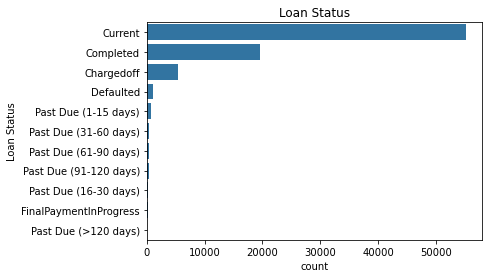

In [21]:
# Plot the loan status on a Horizontal bar chart
loanstatus_order = df2['LoanStatus'].value_counts().index
ax = sns.countplot(data = df2, y='LoanStatus', color = base_color, order = loanstatus_order)
ax.set_title('Loan Status')
ax.set_ylabel('Loan Status');

Most of the loans in the dataset are current loans. Completed and chargedof loans also contribute a substantial proportion of the total loans. The Loans that are past due are split based on the number of days past due. Most of the loans that are past due are past due by 1 to 15 days. Next, i will investigate the employment status.

### Employment Status

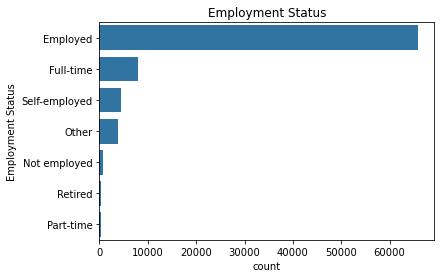

In [22]:
emp_order = df2['EmploymentStatus'].value_counts().index
ax = sns.countplot(data = df2, y='EmploymentStatus', color=base_color, order=emp_order);
ax.set_title('Employment Status')
ax.set_ylabel('Employment Status');

Majority of the borrowers are employed. Next, I will explore the ProsperScore

### Prosper Score

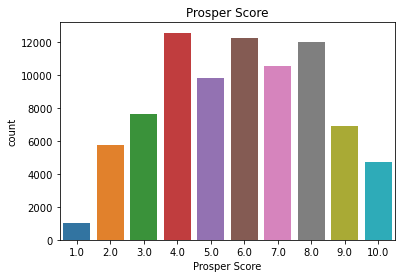

In [23]:
ax = sns.countplot(data = df2, x='ProsperScore')
ax.set_title('Prosper Score')
ax.set_xlabel('Prosper Score');

Majority of the borrrowers scored between 4 and 8 in the prosper rating score. Next, I will explore the stated monthly income.

### Monthly Income

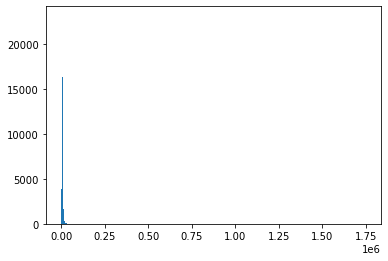

In [24]:
plt.hist(data = df2, x = 'StatedMonthlyIncome', bins = 1000);

We notice great skewness on one side. This shows that we might be having some outliers.

In [25]:
income_std = df2['StatedMonthlyIncome'].std()
income_mean = df2['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(df2[df2['StatedMonthlyIncome'] >= boundary])

232

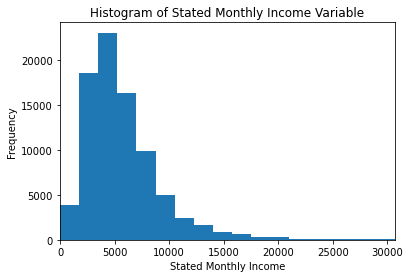

In [26]:
plt.hist(data = df2, x = 'StatedMonthlyIncome', bins = 1000)
plt.xlim(0, boundary)
plt.xlabel('Stated Monthly Income') 
plt.ylabel('Frequency')
plt.title('Histogram of Stated Monthly Income Variable');

The skewness on one side is still noticable. What we also see is that the mode is 5000. Next, i will explore the loan amount.

### Loan Original Amount

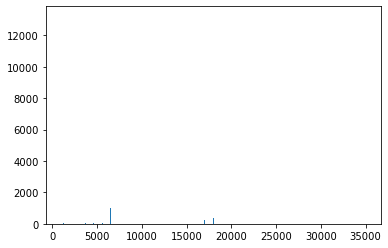

In [27]:
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = 5000);

In [28]:
#Let us check for outliers just like we did for the income variable
income_std = df2['LoanOriginalAmount'].std()
income_mean = df2['LoanOriginalAmount'].mean()
boundary = income_mean + income_std * 3
len(df2[df2['LoanOriginalAmount'] >= boundary])

534

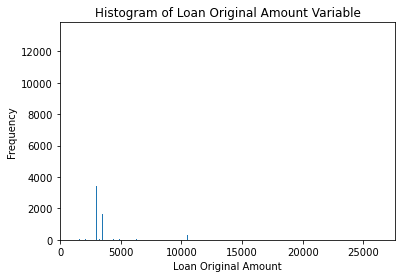

In [29]:
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = 5000)
plt.xlim(0, boundary)
plt.xlabel('Loan Original Amount') 
plt.ylabel('Frequency')
plt.title('Histogram of Loan Original Amount Variable');

The loan original amount variable is affected by outliers. Despite making an adjustment and excluding them in our histogram plot, they are still there and we also notice a skewness on the left side.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The stated monthly income and loan original amount variables are skewed to the left. The mode income is 5000. Majority of the borrowers are employed and had a prosper score rating of between 4 and 8. Most of the loans featured are current loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We did the cleaning before we began the univariate data analysis. Eve though there are sm outliers in the monthly income and loan original amount variables, I will not remove them for now.

## Bivariate Exploration

Here, I am interested in the completed versus defaulted loans only. I will also include the charged off loans because these are written off loans and i will re-lable them as defaulted. My bivariate analysis will be focused on this feature.

In [30]:
#Preparing the loan status column
condition = (df2['LoanStatus'] == 'Completed') | (df2['LoanStatus'] == 'Defaulted') |\
                  (df2['LoanStatus'] == 'Chargedoff')
df2 = df2[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df2['LoanStatus'] = df2.apply(change_to_defaulted, axis=1)
df2['LoanStatus'].value_counts()

Completed    19633
Defaulted     6340
Name: LoanStatus, dtype: int64

After picking the loan statuses that I am interested in, I now have 19633 completed loans and 6340 defaulted.

### Loan status and Prosper rating 

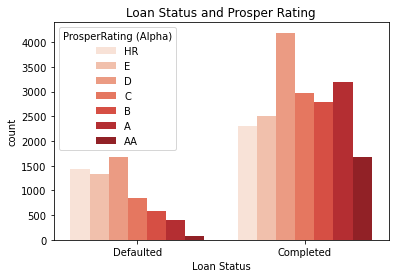

In [31]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.set_title('Loan Status and Prosper Rating')
ax.set_xlabel('Loan Status');


The most common prosper rating among the completed loans is D. This is also the most common rating among the defaulters. Next, I will look at the loan status and employment status

### Loan Status and Employment Status

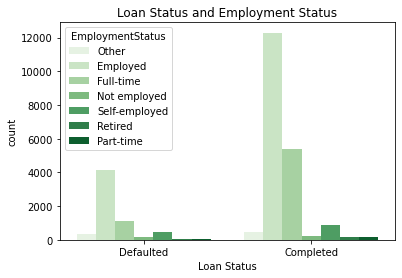

In [32]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Greens')
ax.set_title('Loan Status and Employment Status')
ax.set_xlabel('Loan Status');

The most common mployment status among the borrowers who have completed their loans is Employed followed by full time employment status. Among the defaulters, the most common employment status is employed also followed by full time employment status. Next, I will look at loan status and stated monthly income.

### Loan Status and Loan Original Amount

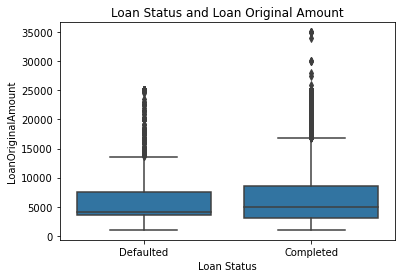

In [33]:
ax = sns.boxplot(data = df2, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)
ax.set_title('Loan Status and Loan Original Amount')
ax.set_xlabel('Loan Status');

Smaller amounts are involved among the defaulters compared to the borrowers who have completed their loans. Next, I will look at the prosper rating and employment status

### Prosper rating and employment status

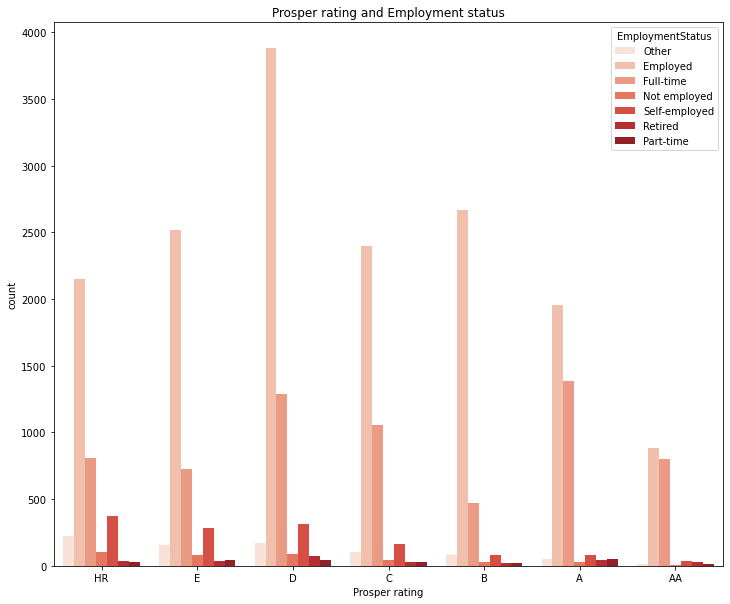

In [34]:
plt.figure(figsize = [12, 10])
ax = sns.countplot(data = df2, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Reds')
ax.set_title('Prosper rating and Employment status')
ax.set_xlabel('Prosper rating');

Lower prosper ratings seem to have greater proportions of individuals with employment statuses: Not Employed, Self-employed, Retired and Part-Time. Next, I will look at loan status and Prosper score.

### Loan Status and Prosper Score

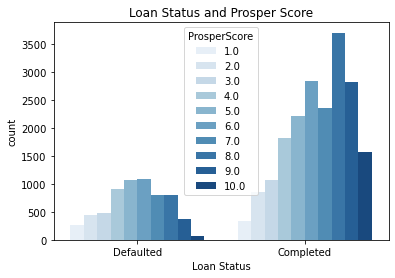

In [35]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Blues')
ax.set_title('Loan Status and Prosper Score')
ax.set_xlabel('Loan Status');

Among the defaulters, the most common scores are between 4 and 6 whereas among the borrowers whose loans are complete, the most common scores are between 6 and 9.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The original loans amounts among the defaulters are smaller. Most of the defaulters have a prosper rating of D and majority are employed. Looking also at their prosper scores, they tend to have lower scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Lower prosper ratings seem to have greater proportions of individuals with employment statuses: Not Employed, Self-employed, Retired and Part-Time. Also, rating D is most common among both defaulters and borrowers whose loans have been paid fully.

## Multivariate Exploration

### Posper rating, Loan Status and Original loan amount

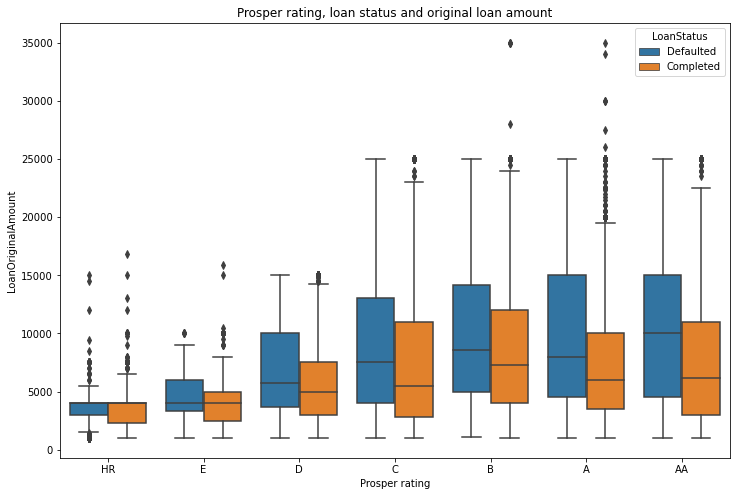

In [36]:
plt.figure(figsize = [12, 8])
ax = sns.boxplot(data=df2, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus')
ax.set_title('Prosper rating, loan status and original loan amount')
ax.set_xlabel('Prosper rating');

Most of the defaults are from borrowers with a lower prosper rating and the involved original loan amounts are higher compared to the borrowers who have completed paying off their loans.

### Loan original amount, loan status and prosper score

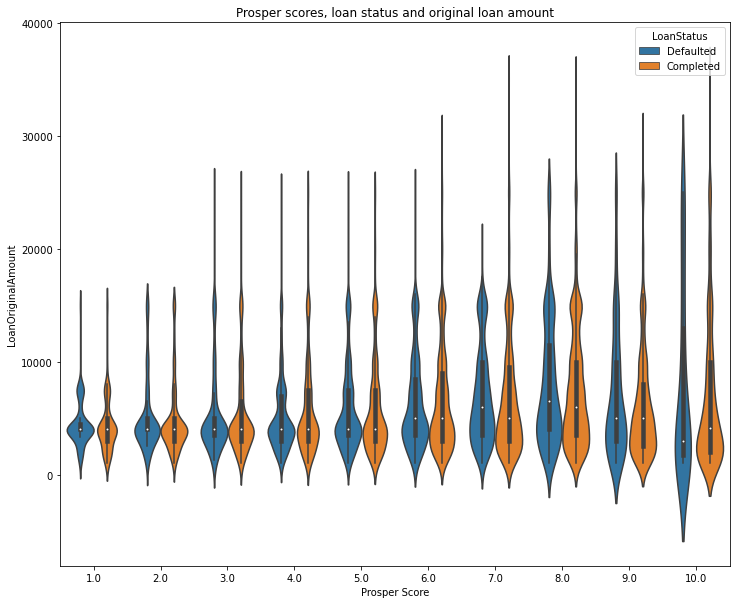

In [37]:
plt.figure(figsize = [12, 10])
ax = sns.violinplot(data=df2, x='ProsperScore', y='LoanOriginalAmount', hue='LoanStatus')
ax.set_title('Prosper scores, loan status and original loan amount')
ax.set_xlabel('Prosper Score');

Most of the defaulters have lower proper scores and the amounts involved are slightly higher compared to the other group.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The defualters ahve lower proper ratings and the involved loan amounts are higher. Looking at the credit scores, most of the defaulters have lower scores and amounts involved are higher.

### Were there any interesting or surprising interactions between features?

The original loan amounts among the defaulters are higher compared to the completed category.